In [ ]:
# Import libraries for data analysis and visualization (pandas, numpy, matplotlib, seaborn)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load tourism dataset from CSV file into a Pandas DataFrame
Tourism_df = pd.read_csv(r"D:\TRANSACTION PROJECT\Full Tourism Data.csv")

In [ ]:
# Display the first two rows of the tourism dataset
Tourism_df.head(2)

In [ ]:
# Check for missing values in the tourism dataset
Tourism_df.isna().sum()

In [ ]:
# Count the number of duplicate rows in the tourism dataset
Tourism_df.duplicated().sum()

0

In [ ]:
# Count the number of non-null values in each column of the tourism dataset
Tourism_df.count()

In [ ]:
# Create 'rating_df' by selecting relevant columns for tourism analysis
# Assuming df is your original DataFrame
rating_df =Tourism_df[[
    'Contenent', 'Region', 'Country', 'CityName',  # User demographics
    'VisitYear', 'VisitMonth', 'VisitModeName',  # Visit details
    'AttractionId','Attraction','AttractionType', 'AttractionAddress', 'Rating'  # Attraction attributes
]].copy()


In [ ]:
# Display the first 25 rows of 'rating_df'
rating_df.head(25)

In [ ]:
# Display unique values in the 'Contenent' column of 'rating_df'
rating_df["Contenent"].unique()

In [ ]:
# Display unique values in the 'Region' column of 'rating_df'
rating_df["Region"].unique()

In [ ]:
# Count the number of unique cities in the 'CityName' column of 'rating_df'
rating_df["CityName"].nunique()

In [ ]:
# Display unique values in the 'Rating' column of 'rating_df'
rating_df["Rating"].unique()

In [ ]:
# Count the number of unique countries in the 'Country' column of 'rating_df'
rating_df["Country"].nunique()

In [ ]:
# Display unique values in the 'VisitModeName' column of 'rating_df'
rating_df["VisitModeName"].unique()

In [ ]:
# Count the number of unique values in each column of 'rating_df'
rating_df.nunique()

In [ ]:
# Group 'rating_df' by country, city, visit details, and attraction to calculate the average rating
#rating_dataframe=rating_df.groupby
(
["Country", "CityName", "VisitYear", "VisitMonth", "VisitModeName", "Attraction","AttractionType"]).agg(
    AvgRating=("Rating", "mean")
).reset_index()


In [ ]:
# Perform Shapiro-Wilk test to check if 'Rating' follows a normal distribution
from scipy.stats import shapiro

# Checking if 'Rating' follows a normal distribution
stat, p = shapiro(rating_df["Rating"])
print(f"Shapiro-Wilk Test p-value: {p:.4f}")

if p > 0.05:
    print("The data is normally distributed.")
else:
    print("The data is NOT normally distributed.")


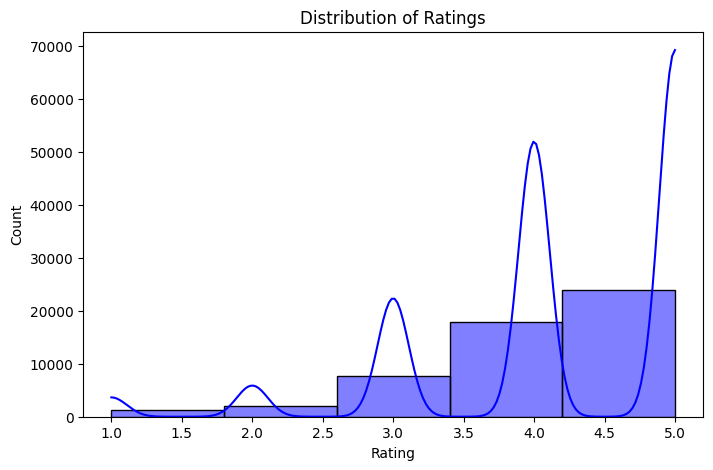

In [ ]:
# Plot the distribution of 'Rating' using a histogram with KDE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(rating_df["Rating"], bins=5, kde=True, color="blue")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [ ]:
# Count the number of duplicate rows in 'rating_df'
rating_df.duplicated().sum()

In [ ]:
# Import libraries for data preprocessing, model training, and evaluation (train_test_split, OneHotEncoder, StandardScaler, XGBRegressor, error metrics)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Define selected features for model training
selected_features = [
    "VisitYear", "VisitMonth", "VisitModeName",
    "AttractionId", "AttractionType", "Country", "CityName"
]

In [ ]:
# Select features (X) and target variable (y) for model training
# Filter dataset
X = rating_df[selected_features]
y = rating_df["Rating"]

In [ ]:
# Apply one-hot encoding to categorical features in X
# One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Display the first few rows of the encoded feature dataset X
X.head()

In [ ]:
# Scale the feature dataset X using StandardScaler
#scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train an XGBoost Regressor model on the training data
# Train XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Import DecisionTreeRegressor and RandomForestRegressor for model training
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [ ]:
# Train Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict Ratings
dt_pred = dt_model.predict(X_test)

# Round predictions to nearest integer (since Rating is 1-5)
dt_pred = np.round(dt_pred).astype(int)
dt_pred = np.clip(dt_pred, 1, 5)  # Ensure predictions stay within 1-5

# Evaluate Model
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

print(f"Decision Tree Regressor → MAE: {dt_mae}, RMSE: {dt_rmse}")


In [ ]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Import joblib for model saving and loading
import joblib

In [ ]:
joblib.dump(rf_model,r"D:\TRANSACTION PROJECT\rating rf model.pkl")

In [ ]:

# Predict, round, and clip ratings using Random Forest model, then evaluate with MAE and RMSE
rf_pred = rf_model.predict(X_test)

# Round predictions to nearest integer (since Rating is 1-5)
rf_pred = np.round(rf_pred).astype(int)
rf_pred = np.clip(rf_pred, 1, 5)  # Ensure predictions stay within 1-5

# Evaluate Model
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"Random Forest Regressor → MAE: {rf_mae}, RMSE: {rf_rmse}")

In [ ]:
# Calculate and display R² scores for Decision Tree and Random Forest models
from sklearn.metrics import r2_score

# Calculate R² Score
dt_r2 = r2_score(y_test, dt_pred)  # Decision Tree
rf_r2 = r2_score(y_test, rf_pred)  # Random Forest

print(f"Decision Tree R² Score: {dt_r2:.4f}")
print(f" Random Forest R² Score: {rf_r2:.4f}")


In [ ]:
import xgboost
import sklearn

print("XGBoost Version:", xgboost.__version__)
print("Scikit-learn Version:", sklearn.__version__)
